In [1]:
# Importing the Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sns

# 1A) Metropolis Hastings Model

In [2]:
def target_function(x):
    return 0.5 * np.exp(-np.abs(x))

def proposed_function(x,s):
    return np.random.normal(x,s,1)

In [3]:
def metropolis_hastings(N, s, x_zero):
    # Create an empty array to store samples
    samples_metropolis_hastings = np.zeros(N)
    x_current = x_zero  # Start point

    for i in range(N):
        # Generate a sample from a normal distribution
        x_star = proposed_function(x_current, s)
        
        # Acceptance ratio
        alpha_ratio = target_function(x_star) / target_function(x_current)
        
        # Acceptance criteria if alpha_ratio < 1
        u = np.random.uniform(0, 1)
        if u < alpha_ratio:
            x_current = x_star
        else:
            x_current = x_current

        samples_metropolis_hastings[i] = x_current

    return samples_metropolis_hastings

In [4]:
x_zero = 0
N = 10000
s = 1 
samples_metropolis_hastings = metropolis_hastings(N, s, x_zero)

/var/folders/zh/fqwlrsqs1ms6lk18kb70z3200000gn/T/ipykernel_35910/681321831.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  samples_metropolis_hastings[i] = x_current


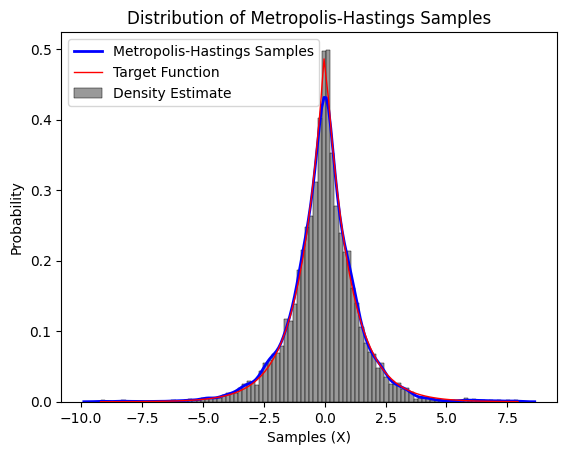

In [5]:
#deals with the error of array being 2 dimentional
one_d_samples = samples_metropolis_hastings.flatten()

# Creates the dataframe for plotting 
samples_df = pd.DataFrame({'x': one_d_samples})

#creating the 'canvas'
plt.subplots()

# histogram
sns.histplot(samples_df['x'], bins=100, kde=False, stat='density', color='grey', edgecolor='black', alpha=0.8)

# kernal density plot
sns.kdeplot(samples_df['x'], color='blue', linestyle='-', linewidth=2)

# target function plot
x_values = np.linspace(min(samples_df['x']), max(samples_df['x']), 100)
plt.plot(x_values, target_function(x_values), color='red', linestyle='-', linewidth=1)

#labels,legend and title
plt.title('Distribution of Metropolis-Hastings Samples')
plt.xlabel('Samples (X)')
plt.ylabel('Probability')
plt.legend(['Metropolis-Hastings Samples','Target Function', 'Density Estimate'])
plt.show()

In [6]:
# Report Monte Carlo estimates of mean and standard deviation
mean_estimate_MCMC = np.mean(samples_metropolis_hastings)
std_dev_estimate_MCMC = np.std(samples_metropolis_hastings)
print("The Monte Carlo Estimates of the mean is", mean_estimate_MCMC, "and the standard deviation is", std_dev_estimate_MCMC)

The Monte Carlo Estimates of the mean is -0.04739325537460511 and the standard deviation is 1.441478057961484


# 1B) Convergence diagnosis Funtions

In [7]:
def mean_function(x):
    return np.mean(x)
def variance_function(x):
    average = mean_function(x)
    return np.mean((x - average) ** 2)

In [8]:
J = 4
N = 2000
s_values = np.arange(0.001, 1.001, 0.001)
r_hat_array = np.zeros_like(s_values)

for i, s in enumerate(s_values):
    sample_list = []
    for j in range(J):
        x_zero_j = np.random.normal()
        samples_j = metropolis_hastings(N, s, x_zero_j)
        sample_list.append(samples_j)
    m_j = np.array([mean_function(samples) for samples in sample_list])
    v_j = np.array([variance_function(samples) for samples in sample_list])
    W = np.mean(v_j)
    M = np.mean(m_j)
    B = np.var(m_j)
    r_hat = np.sqrt((B + W) / W)
    r_hat_array[i] = r_hat

/var/folders/zh/fqwlrsqs1ms6lk18kb70z3200000gn/T/ipykernel_35910/681321831.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  samples_metropolis_hastings[i] = x_current


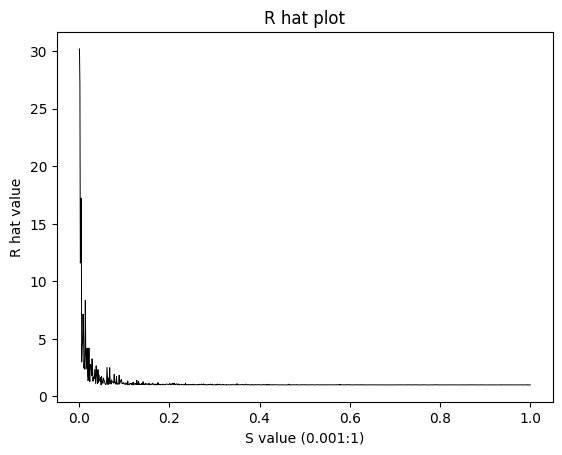

In [9]:
plt.subplots()
plt.plot(s_values, r_hat_array, color='black', linestyle='-',linewidth=0.7)
plt.title('R hat plot')
plt.xlabel('S value (0.001:1)')
plt.ylabel('R hat value')
plt.show()

##### Since the r-hat values asymptotes to 0 as S approaches 1, the metropolis-hastings model shows signs of convergence